# Step responses exemple

(0.0, 360.0)

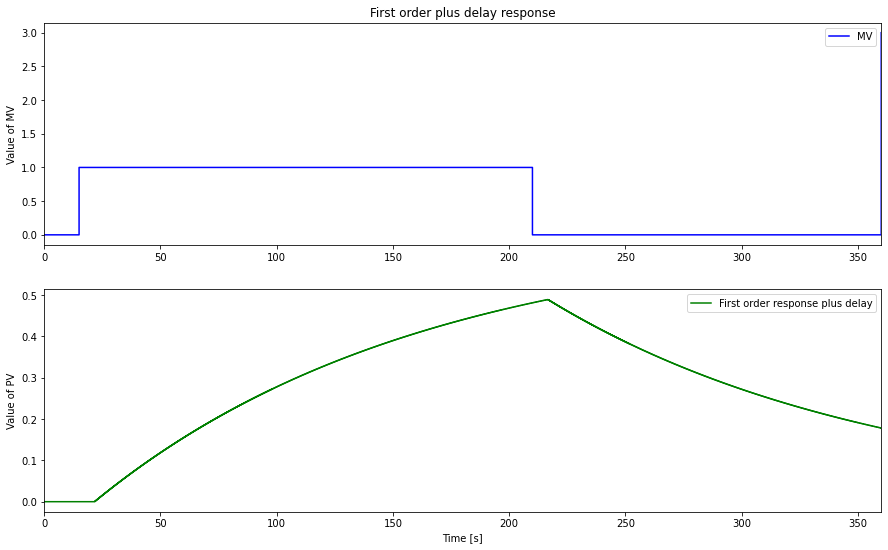

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

import package_JM_RS
from package_JM_RS import GraphDV,GraphMV

#Final SSE Objective: 0.03787173811807361
#K: 0.654997667761135
#T: 141.9367358894029
#theta: 6.678212203596281


TSim = 360
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 15: 1, 210: 0, TSim: 3}

t = []
MV = []

# Parameters
Kp = 0.65499766776113
T = 141.9367358894029
theta = 6.678212203596281

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# Les données pour les graphes

#Final SSE Objective: 0.04819777086011469   C'est les données pour le FO de MV
#K: 0.7243802703300896
#T: 188.2083738101243
#theta: 2.03471691146492


#Final SSE Objective: 0.047635609582858146  C'est les données pour le SO de MV
#K: 0.7234307602222567
#T1: 187.6540651094786
#T2: 1.932656279346386
#theta: 4.094020183851302e-05

#Final SSE Objective: 0.019689890027999243  c'est les données pour le FO de DV
#K: 0.5823251622933139
#T: 216.06596903507676
#theta: 16.536071223329817

#Final SSE Objective: 0.015990095303544737  c'est les données pour le SO de DV
#K: 0.5748891859713147
#T1: 207.71400992590017
#T2: 14.85365011964857
#theta: 3.0000002909240173

# -------------------------------------------------------------------------------------
#new data

#Final SSE Objective: 0.04465412103631918        FO for MV
#K: 0.5231111134672899
#T: 133.33386757169725
#theta: 6.466709453815119


#Final SSE Objective: 0.04667006534680288        SO for MV
#K: 0.5194904467673822
#T1: 129.9860279570493
#T2: 2.2419668343920548e-08
#theta: 7.219217782540495

Final SSE Objective: 0.11937446693761111        FO for DV
K: 0.5094803420759484
T: 204.77206703868117
theta: 6.47400767956359

Final SSE Objective: 0.11767822612340492       SO for DV
K: 0.5066617883318505
T1: 198.90601996256459
T2: 8.124468051389487
theta: 1.0918143519352412

K = 0.43        Handraw
t1 = 42
t2 = 58
Tu = 78
Tg = 65

                    Broida Simple
Kp= 0.43
T= 65
theta= 78

                       
Kp= 0.43                   Broida Complex
T= 5.5*(58-42)
theta= 2.8*42-1.8*58


                                 Van der Grinten Model
Tg = 65
Tu = 78
t1 = 42
t2 = 58
a = 0.09

Kp = 0.43
T1 = Tg*((3*a*e)-1)/(1+(a*e))
T2 = Tg*(1-a*e)/(1+a*e)
theta = Tu - (T1*T2)/(T1 +3*T2)                                 
                                 
                                          Strejc
                                          
????????????????                                         

# Step responses on the real curve for the FO of MV

(0.0, 500.0)

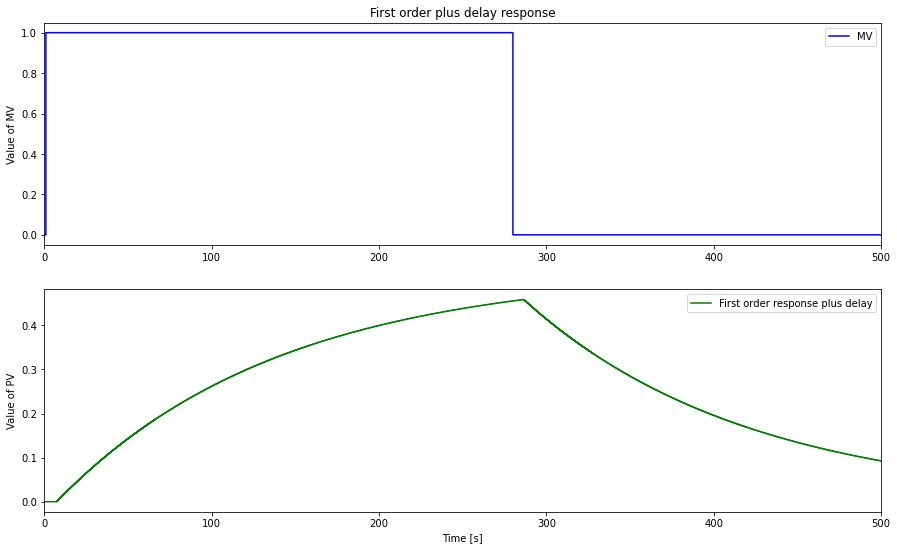

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 0}

t = []
MV = []

# Parameters
Kp= 0.5231111134672899
T= 133.33386757169725
theta= 6.466709453815119

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV2 = FOPDT(MV,Kp+1,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

#plt.subplot(2,1,2)
#plt.step(t,PV2,'g-',label='First order response plus delay',where='post')
#plt.ylabel('Value of PV')
#plt.xlabel('Time [s]')
#plt.legend(loc='best')
#plt.xlim([0, TSim])  

# Step responses on the real curve for the SO of MV

(0.0, 500.0)

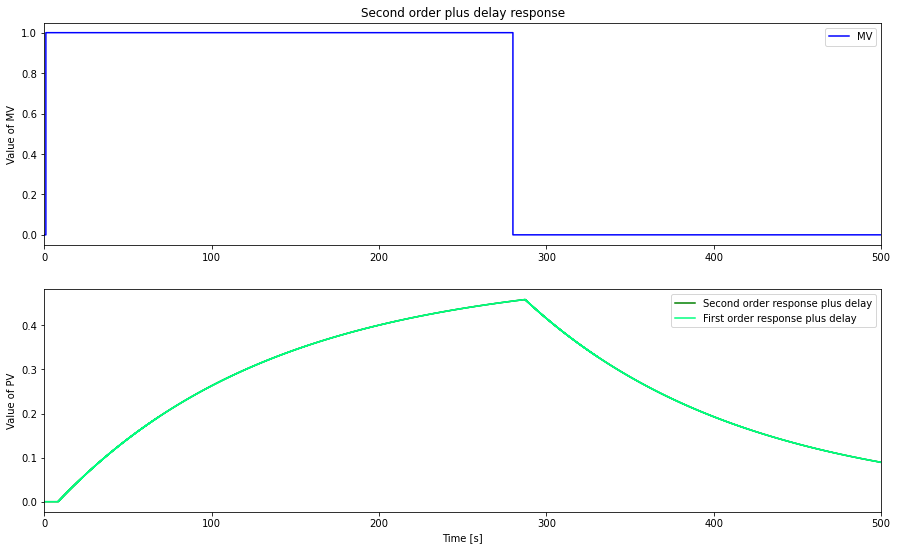

In [3]:
TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 0}

t = []
MV = []

Kp = 0.5194904467673822
theta = 7.219217782540495
T1 = 129.9860279570493
T2 = 2.2419668343920548e-08

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# FO DV

(0.0, 620.0)

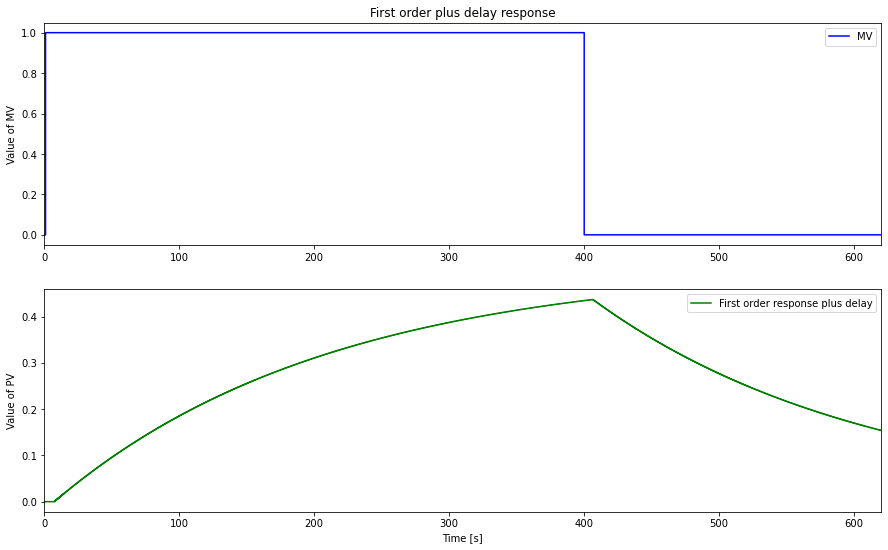

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

TSim = 620
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,400: 0, TSim: 0}

t = []
MV = []

# Parameters
Kp= 0.5094803420759484
T= 204.77206703868117
theta= 6.47400767956359

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
PV2 = FOPDT(MV,Kp+1,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

#plt.subplot(2,1,2)
#plt.step(t,PV2,'g-',label='First order response plus delay',where='post')
#plt.ylabel('Value of PV')
#plt.xlabel('Time [s]')
#plt.legend(loc='best')
#plt.xlim([0, TSim])  

# SO for DV

(0.0, 620.0)

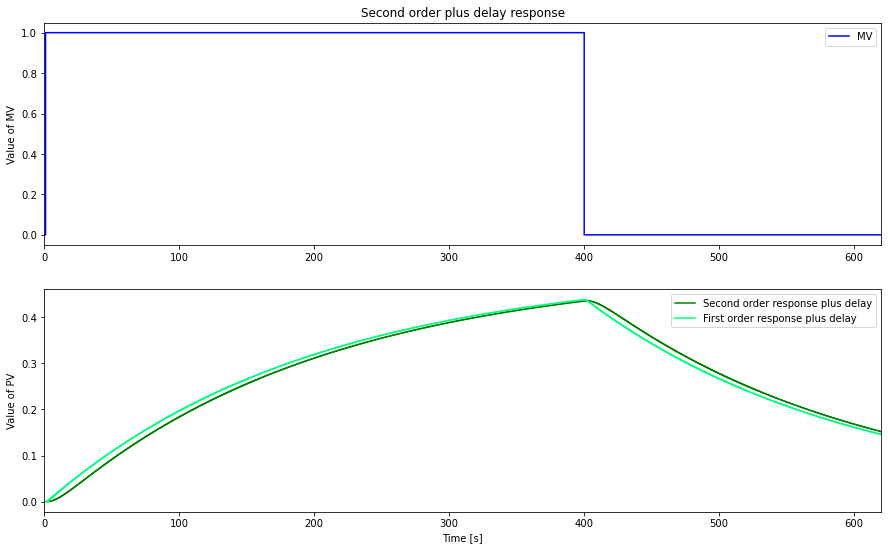

In [5]:
TSim = 620
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,400: 0, TSim: 0}

t = []
MV = []

Kp= 0.5066617883318505
T1= 198.90601996256459
T2= 8.124468051389487
theta= 1.0918143519352412

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# Parameters obtained by hand approximation

In [6]:
K = 0.43
a = 0.13
Tu = 10.29
Tg = 122.06
t1 = 42.65
t2 = 55.89

# Simple Broida

(0.0, 500.0)

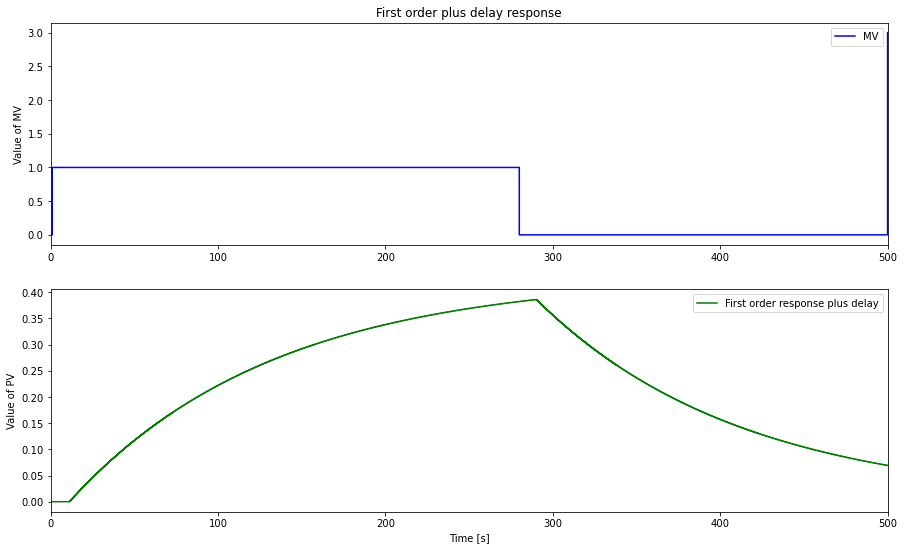

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 3}

t = []
MV = []

# Parameters
Kp= K
T= Tg
theta= Tu

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  



# Complex Broida

18.817999999999984


(0.0, 500.0)

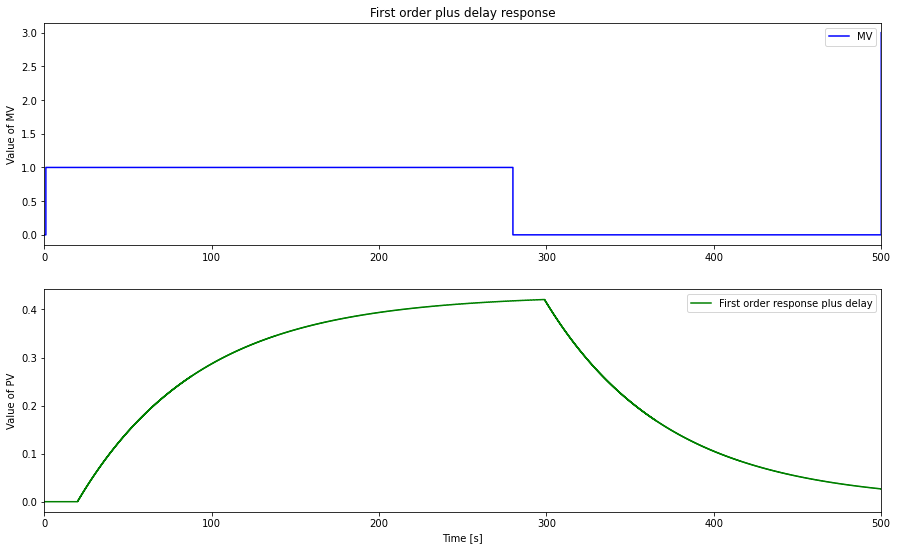

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 3}

t = []
MV = []

# Parameters
Kp= 0.43
T= 5.5*(t2-t1)
theta= 2.8*t1-1.8*t2
print(theta)

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  



# Van der Grinten Model

5.42307070213812
58.31846464893094
8.536657894295534


(0.0, 500.0)

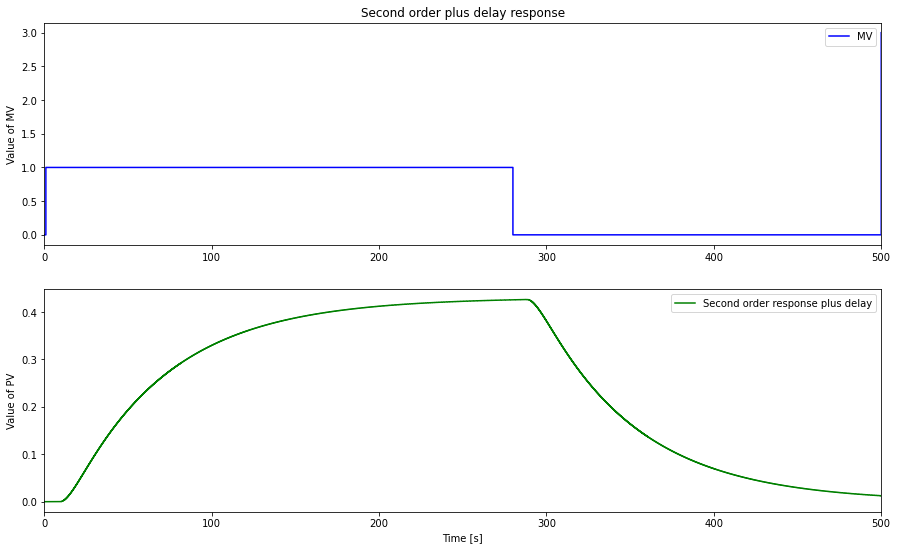

In [9]:
from math import e

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 3}

t = []
MV = []



Kp = K
T1 = Tg*((3*a*e)-1)/(1+(a*e))
T2 = Tg*(1-a*e)/(1+a*e)
theta = Tu - (T1*T2)/(T1 +3*T2)

print(T1)
print(T2)
print(theta)

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    

PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# Strejc Model

T 332.00320000000005
Theta 1.9160000000000021


(0.0, 500.0)

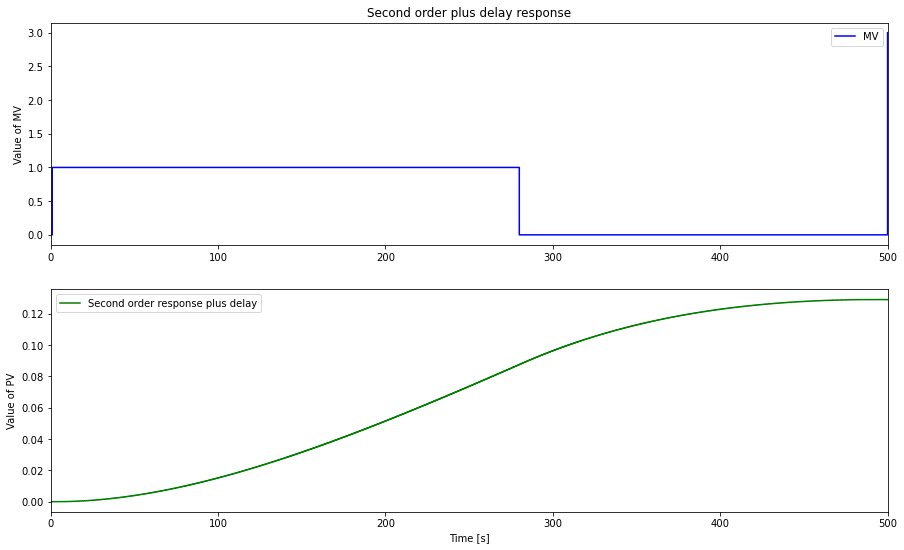

In [10]:
from math import e

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 3}

t = []
MV = []



Kp = K
anexp = Tu/Tg # 0.08430280190070456 => Rounded at the nearest value = 0.10 => Second order
an = 0.10
bn = 2.72
T = bn*Tg
Tuth = Tg*an
theta = abs(Tu - Tuth)

print('T' , T)
print('Theta', theta)

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    

PVSOPDT = SOPDT(MV,Kp,T,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

 # Bode diagrams of real curves

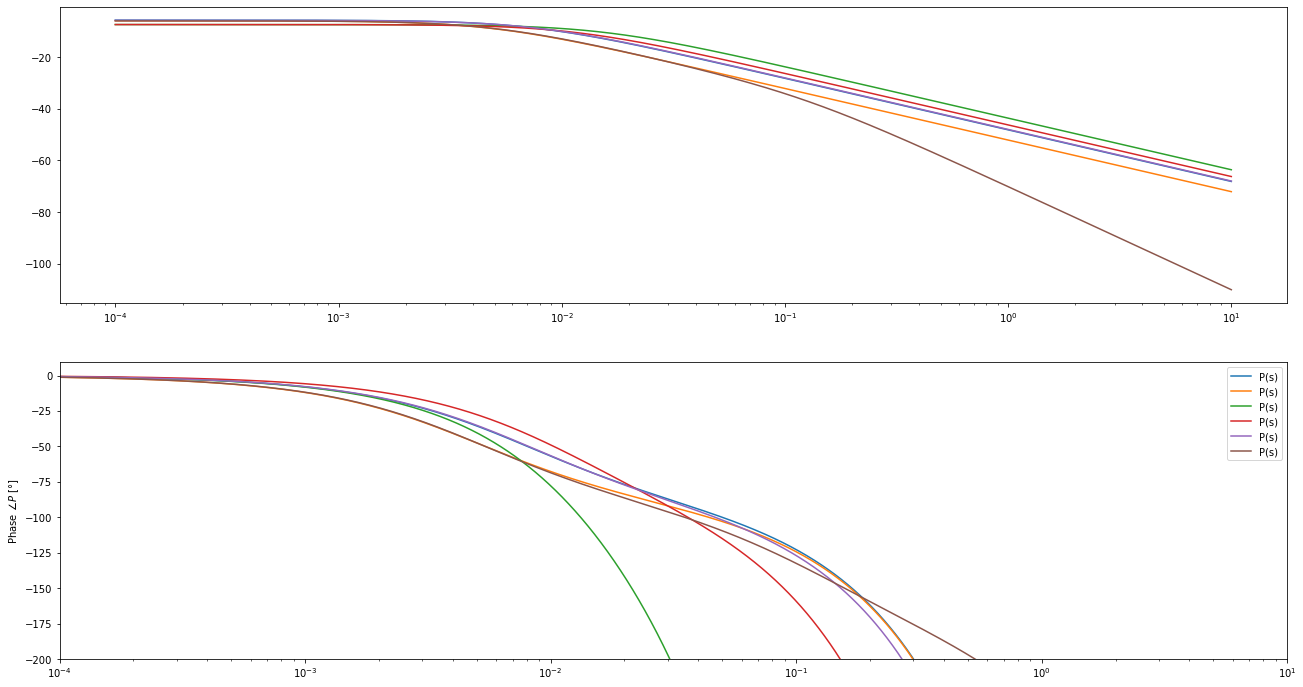

In [11]:
def PlotBode(Kp1,Tlag11,theta1,Kp2,Tlag12,theta2,Kp3,Tlag13,theta3,Kp4,Tlag14,theta4,Kp5,Tlag15,Tlag25,theta5,Kp6,Tlag16,Tlag26,theta6):

    P = Process({}) # Default process = unit gain
    P2 =Process({}) # Default process = unit gain
    P3 =Process({}) # Default process = unit gain
    P4 =Process({}) # Default process = unit gain
    P5=Process({}) # Default process = unit gain
    P6=Process({}) # Default process = unit gain

    # Parameters for input-output dynamics
    
    P.parameters['Kp'] = Kp1
    P.parameters['Tlag1'] = Tlag11
    P.parameters['theta'] = theta1
    
    P2.parameters['Kp'] = Kp2
    P2.parameters['Tlag1'] = Tlag12
    P2.parameters['theta'] = theta2
    
    P3.parameters['Kp'] = Kp3
    P3.parameters['Tlag1'] = Tlag13
    P3.parameters['theta'] = theta3
    
    P4.parameters['Kp'] = Kp4
    P4.parameters['Tlag1'] = Tlag14
    P4.parameters['theta'] = theta4
    
    P5.parameters['Kp'] = Kp5
    P5.parameters['Tlag1'] = Tlag15
    P5.parameters['Tlag2'] = Tlag25
    P5.parameters['theta'] = theta5
    
    P6.parameters['Kp'] = Kp6
    P6.parameters['Tlag1'] = Tlag16
    P6.parameters['Tlag2'] = Tlag26
    P6.parameters['theta'] = theta6
    

    omega = np.logspace(-4, 1, 10000)

    Ps = Bode(P, omega, Show= False)
    Ps2 = Bode(P2, omega, Show= False)
    Ps3 = Bode(P3, omega, Show= False)
    Ps4 = Bode(P4, omega, Show= False)
    Ps5 = Bode(P5, omega, Show= False)
    Ps6 = Bode(P6, omega, Show= False)

    fig, (ax_gain, ax_phase) = plt.subplots(2,1)
    fig.set_figheight(12)
    fig.set_figwidth(22)


    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps2)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps3)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps4)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps5)),label='P(s)')
    ax_gain.semilogx(omega,20*np.log10(np.abs(Ps6)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps2)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps3)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps4)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps5)),label='P(s)')
    ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps6)),label='P(s)')
    ax_phase.set_xlim([np.min(omega), np.max(omega)])
    ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps))) - 10
    ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps))) + 10
    ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
    ax_phase.set_ylabel(r'Phase $\angle P$ [°]')
    ax_phase.legend(loc='best')



PlotBode(0.5231111134672899,133.33386757169725,6.466709453815119,0.5094803420759484,204.77206703868117,6.47400767956359,0.43,65,78,0.43,5.5*(58-42),2.8*42-1.8*58,0.5194904467673822,129.9860279570493,2.2419668343920548e-08,7.219217782540495,0.5066617883318505,198.90601996256459,8.124468051389487,1.0918143519352412)

# GrapheDV le vrai

In [12]:
#GraphDV()

# Graphe MV le vrai


In [13]:
# GraphMV()

# Step response grouped

(0.0, 500.0)

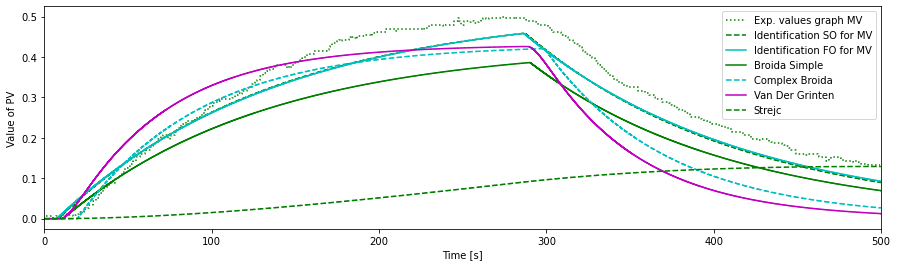

In [21]:
from package_JM_RS import GraphMV, GraphDV 

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV 
MV = []# 
MVPath = {0: 0, 1:1 ,280: 0, TSim: 0}
t = []
PVIDFOMV = []
PVIDSOMV = []
PVIDFODV = [] 
PVIDSODV = [] 
PVSBroida = [] 
PVCBroida = [] 
PVVDG = [] 
PVStrejc = [] 

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)

# Identification FO for MV

Kp= 0.5231111134672899
T= 133.33386757169725
theta= 6.466709453815119

PVIDFOMV = FOPDT(MV,Kp,T,theta,Ts)

# Identification SO for MV

Kp = 0.5194904467673822
theta = 7.219217782540495
T1 = 129.9860279570493
T2 = 2.2419668343920548e-08

PVIDSOMV = SOPDT(MV,Kp,T1,T2,theta,Ts)

# Identification FO for DV
Kp= 0.5094803420759484
T= 204.77206703868117
theta= 6.47400767956359

PVIDFODV = FOPDT(MV,Kp,T,theta,Ts)

# Identification SO for DV

Kp = 0.5066617883318505
T1 = 198.90601996256459
T2 = 8.124468051389487
theta = 1.0918143519352412
    
PVIDSODV = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
# Paramètres définis à la main 
    
K = 0.43
a = 0.13
Tu = 10.29
Tg = 122.06
t1 = 42.65
t2 = 55.89

# Simple Broida 
Kp= K
T= Tg
theta= Tu
PVSBroida = FOPDT(MV,Kp,T,theta,Ts)

# Complex Broida
Kp= K
T= 5.5*(t2-t1)
theta= 2.8*t1-1.8*t2
PVCBroida = FOPDT(MV,Kp,T,theta,Ts)

# VanDerGrinten
Kp = K
T1 = Tg*((3*a*e)-1)/(1+(a*e))
T2 = Tg*(1-a*e)/(1+a*e)
theta = Tu - (T1*T2)/(T1 +3*T2)
PVVDG = SOPDT(MV,Kp,T1,T2,theta,Ts)

# Strejc 
Kp = K
anexp = Tu/Tg # 0.08430280190070456 => Rounded at the nearest value = 0.10 => Second order
an = 0.10
bn = 2.72
T = bn*Tg
Tuth = Tg*an
theta = abs(Tu - Tuth)
PVStrejc = SOPDT(MV,Kp,T,T,theta,Ts)

#Graphe réel MV
xMV, ygraphMV = GraphMV()

#Graphe réel MV
xDV, ygraphDV = GraphDV()










plt.figure(figsize = (15,9))

# Plot données éxperimentales MV
plt.subplot(2,1,2)
plt.step(xMV,ygraphMV,'g:',label='Exp. values graph MV',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')

# Plot données éxperimentales DV
# plt.subplot(2,1,2)
# plt.step(xDV,ygraphDV,'g:',label='Exp. values graph DV',where='post')
# plt.ylabel('Value of PV')
# plt.xlabel('Time [s]')
# plt.legend(loc='best')

# plt.subplot(2,1,2)
# plt.step(t,PVIDSODV,'springgreen',label=' Identification SO for DV',where='post')
# plt.ylabel('Value of PV')
# plt.xlabel('Time [s]')
# plt.legend(loc='best')
# plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVIDSOMV,'g--',label='Identification SO for MV',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  


# plt.subplot(2,1,2)
# plt.step(t,PVIDFODV,'y-',label='Identification FO for DV',where='post')
# plt.ylabel('Value of PV')
# plt.xlabel('Time [s]')
# plt.legend(loc='best')
# plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVIDFOMV,'c-',label='Identification FO for MV',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 


plt.subplot(2,1,2)
plt.step(t,PVSBroida,'g-',label='Broida Simple',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVCBroida,'c--',label='Complex Broida',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

plt.subplot(2,1,2)
plt.step(t,PVVDG,'m-',label='Van Der Grinten',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 

plt.subplot(2,1,2)
plt.step(t,PVStrejc,'g--',label='Strejc',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

